In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [10]:
iris=load_iris()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(iris.data)

In [17]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
print(pca.explained_variance_ratio_)
print("Total explained variance: {:.2f}%".format(sum(pca.explained_variance_ratio_)*100))

[0.72962445 0.22850762]
Total explained variance: 95.81%


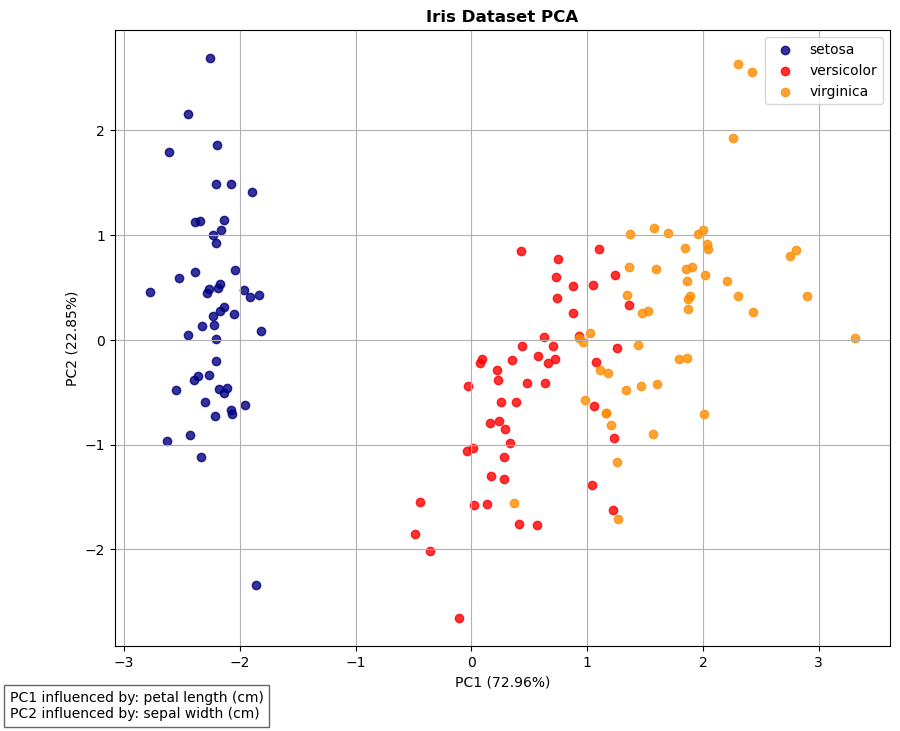

In [ ]:
plt.figure(figsize=(10,8))

colors=['navy', 'red', 'darkorange']
labels=iris.target_names

for i in [0,1,2]:
    plt.scatter(X_pca[iris.target == i, 0],
                X_pca[iris.target == i,1],
                label=labels[i],
                color=colors[i],
                alpha=0.8
                )

plt.grid()
plt.title('Iris Dataset PCA', fontweight='bold')
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.2f}%)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.2f}%)")
plt.legend()

pc1_top = iris.feature_names[np.argmax(np.abs(pca.components_[0]))]
pc2_top = iris.feature_names[np.argmax(np.abs(pca.components_[1]))]

plt.figtext(0.02, 0.02, 
            f"PC1 influenced by: {pc1_top}\nPC2 influenced by: {pc2_top}",
            bbox = dict(facecolor='white', alpha=0.6))
plt.show()

In [26]:
print("\nPCA Component Loadings:")
for i, comp in enumerate(pca.components_):
    print(f"PC{i+1}:")
    for feat, weight in zip(iris.feature_names, comp):
        print(f"  {feat}: {weight:.3f}")



PCA Component Loadings:
PC1:
  sepal length (cm): 0.521
  sepal width (cm): -0.269
  petal length (cm): 0.580
  petal width (cm): 0.565
PC2:
  sepal length (cm): 0.377
  sepal width (cm): 0.923
  petal length (cm): 0.024
  petal width (cm): 0.067
